___
<div id="indice"></div>

## Índice

- [Importando bibliotecas](#bibliotecas)
- [Análise da base de dados](#analise)
    - [Entendendo dataframe](#objetivo)
    - [Gráficos](#graficos)
- [Modelo preditivo](#modelo)
    - [Explicação](#explicacao)
    - [Montagem](#montagem)
    - [Resultados](#resultados)
___

<div id="bibliotecas"></div>

# Importando bibliotecas e abrindo dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nltk.corpus import stopwords
import nltk
from sklearn.metrics import (confusion_matrix, classification_report)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("../dados/df_preparado.csv")

___
<div id="analise"></div>

## Análise

<div id="objetivo"></div>

### Entendendo o dataframe

In [3]:
#Exemplos iniciais
df.head(3)

,id,id_unique,numero_sei,ano_documento,assinaturas,descricao_tipo_documento,descricao_tipo_processo,numero_processo,id_unidade,sigla_unidade,...,documentos_relacionados,qtd_acesso_processo,descricao_especificacao,data_processo,_version_,corpo_texto,qtd_acesso,decisao_tribunal,conteudo,diferenca_dias
0,abbdc450-7ff1-4990-9bcc-8ae4386592f0,jurisprudencia__1390607,1390607,2024,Outras,Voto Processo Administrativo,Processo Administrativo,08700.004558/2019-05,110000967.0,GAB1,...,"{id_unidade:110000967,protocolo_documento:1085...",604,"- Desmembrado Bernd Brünig, Faustino Luigi Mi...",2019-09-13,1800936057604145200,NaN,0,vazio,SEI/CADE - 1390607 - Voto Processo Administrat...,1714
1,b41e8f1f-449e-4d28-a574-18f365d32b6f,jurisprudencia__1384594,1384594,2024,Gustavo Augusto Freitas de Lima,Voto Processo Administrativo,Processo Administrativo,08700.004974/2015-71,110000969.0,GAB3,...,"{id_unidade:110000969,protocolo_documento:0257...",8751,Influencia de conduta uniforme - COFECI,2015-05-21,1800936002855895000,NaN,0,condenacao,SEI/CADE - 1384594 - Voto Processo Administrat...,3276
2,adec625d-4f5e-4514-b938-a295fdc1e8a4,jurisprudencia__1384685,1384685,2024,Outras,Voto,Processo Administrativo,08700.005915/2022-40,110001021.0,DIAP,...,"{id_unidade:110001021,protocolo_documento:1100...",975,Ministério Público do Estado de Minas Gerais,2022-08-08,1800936088917770200,voto\r\n\r\nI. BREVE RESUMO DO PROCESSO&nbsp;\...,0,arquivamento,SEI/CADE - 1384685 - Voto\n\n\nProcesso nº 087...,640


In [4]:
# Coluna de tipo_processo
df['descricao_tipo_processo'].value_counts()

descricao_tipo_processo
Processo Administrativo    739
Name: count, dtype: int64

In [5]:
# Coluna de datas do processo
df['data_processo'].value_counts()

data_processo
2016-04-27    14
2015-09-30    14
2020-11-05    13
2006-05-11    12
2012-10-10    12
              ..
2005-09-30     1
2002-10-16     1
2016-12-29     1
2015-07-08     1
2003-02-20     1
Name: count, Length: 223, dtype: int64

In [6]:
# Coluna de diferença de dias entre o processo e o documento
df['diferenca_dias'].describe()

count     739.000000
mean     2741.774019
std      1313.336567
min        66.000000
25%      1818.500000
50%      2667.000000
75%      3717.500000
max      5841.000000
Name: diferenca_dias, dtype: float64

In [7]:
# Coluna de setor economico analisada por IA
df['setor_economico_secao'].value_counts()

setor_economico_secao
Indústrias de Transformação                                                                218
Comércio, Reparação de Veículos Automotores e Motocicletas                                 116
Transporte, Armazenagem e Correio                                                           87
Outros                                                                                      82
Saúde Humana e Serviços Sociais                                                             43
Construção                                                                                  38
Atividades Financeiras, de Seguros e Serviços Relacionados                                  37
Informação e Comunicação                                                                    32
Atividades Administrativas e Serviços Complementares                                        28
Atividades Profissionais, Científicas e Técnicas                                            22
Comércio, Reparação de Veícu

<div id="graficos"></div>

### Graficos analíticos do dataframe

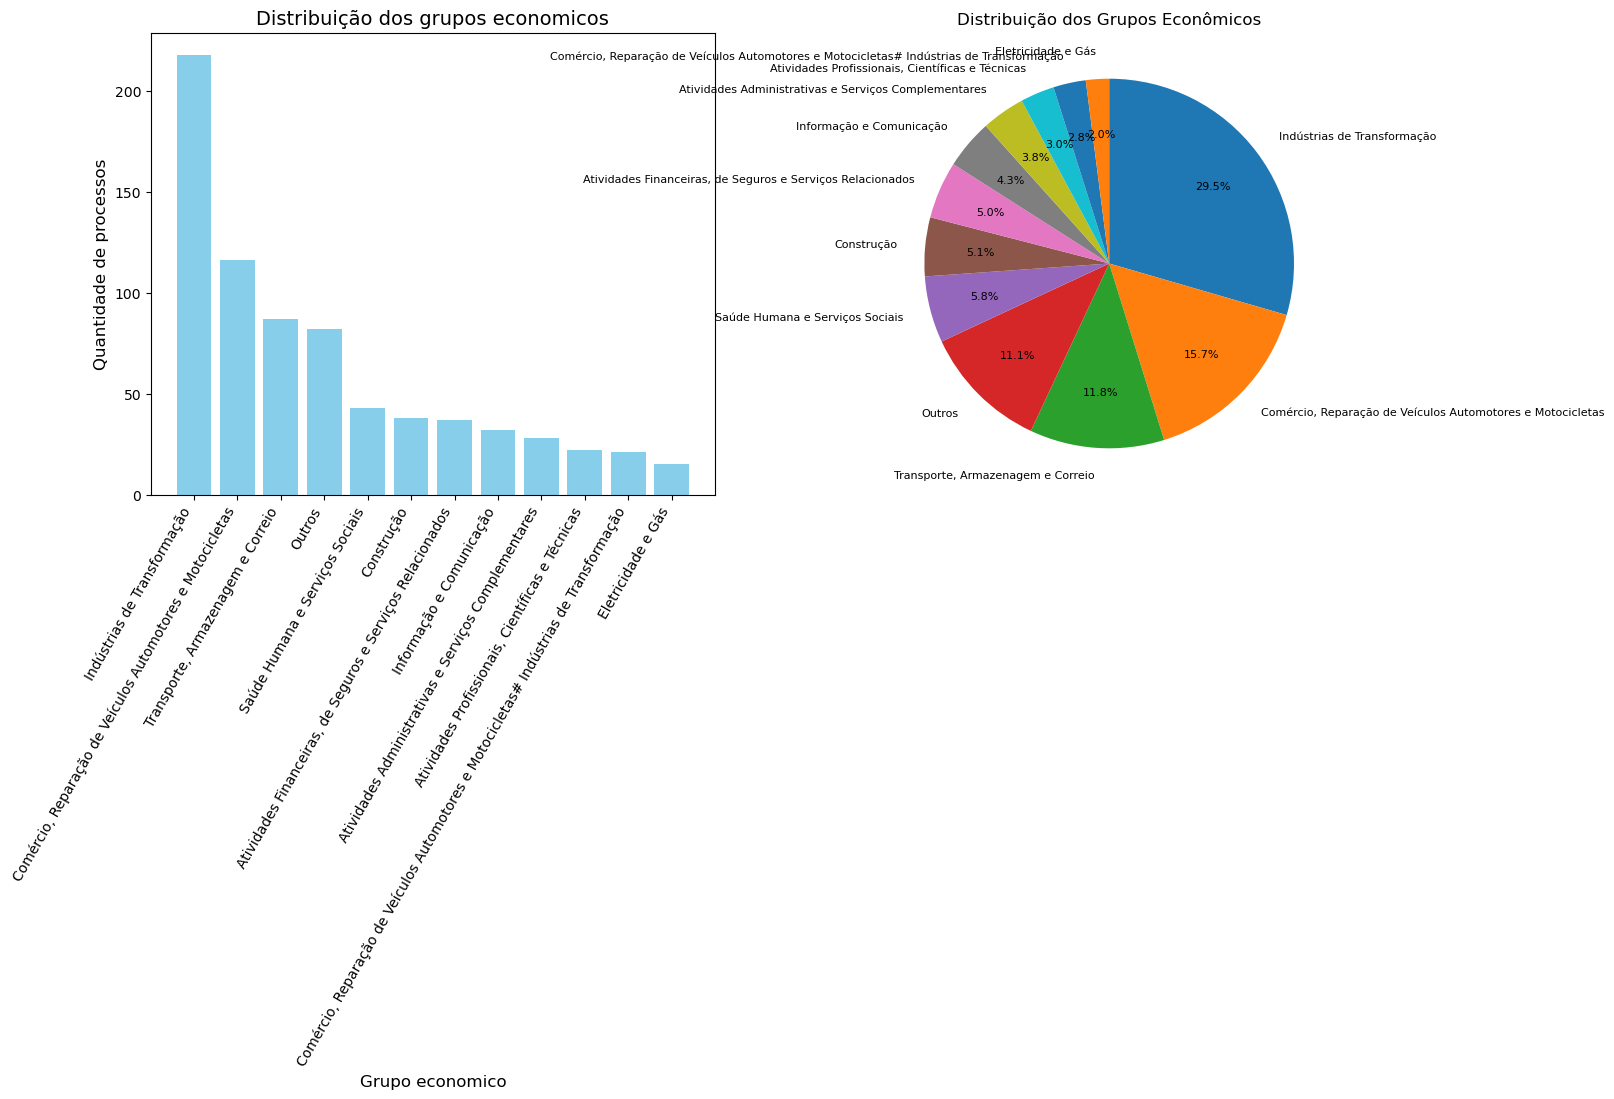

In [8]:
plt.figure(figsize=(16,6))

contagem = df['setor_economico_secao'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos grupos economicos', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 10)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 8}  
)
plt.title('Distribuição dos Grupos Econômicos')

plt.show()

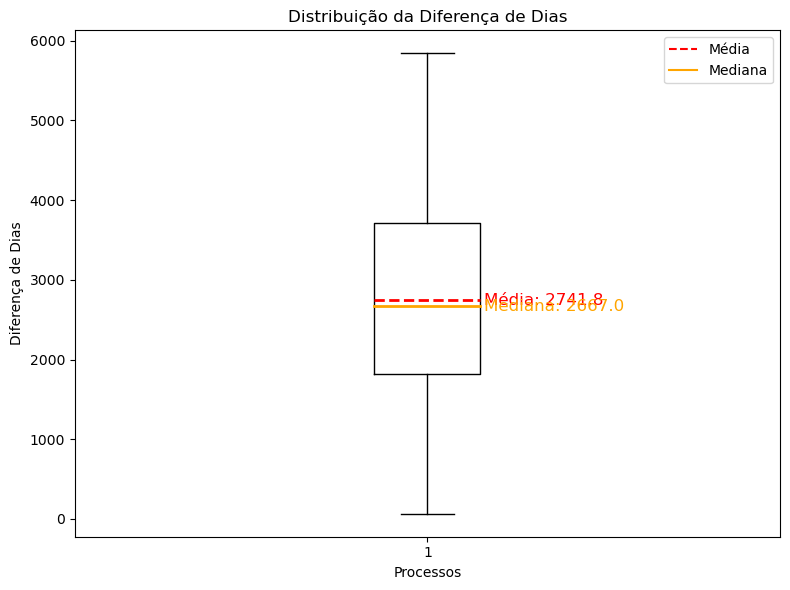

In [9]:
# Supondo que df já está definido
dados = df['diferenca_dias']

media = np.mean(dados)
mediana = np.median(dados)

fig, ax = plt.subplots(figsize=(8,6))

box = ax.boxplot(dados, showmeans=True, meanline=True,
                 meanprops=dict(color='red', linewidth=2),
                 medianprops=dict(color='orange', linewidth=2))

ax.set_title('Distribuição da Diferença de Dias')
ax.set_xlabel('Processos')
ax.set_ylabel('Diferença de Dias')

# Adiciona legenda
ax.annotate(f'Média: {media:.1f}', xy=(1.08, media), xycoords=('data', 'data'),
            color='red', fontsize=12, va='center')
ax.annotate(f'Mediana: {mediana:.1f}', xy=(1.08, mediana), xycoords=('data', 'data'),
            color='orange', fontsize=12, va='center')

# Adiciona legenda
import matplotlib.lines as mlines
mean_line = mlines.Line2D([], [], color='red',linestyle='--', label='Média')
median_line = mlines.Line2D([], [], color='orange', label='Mediana')
ax.legend(handles=[mean_line, median_line])

plt.tight_layout()
plt.show()

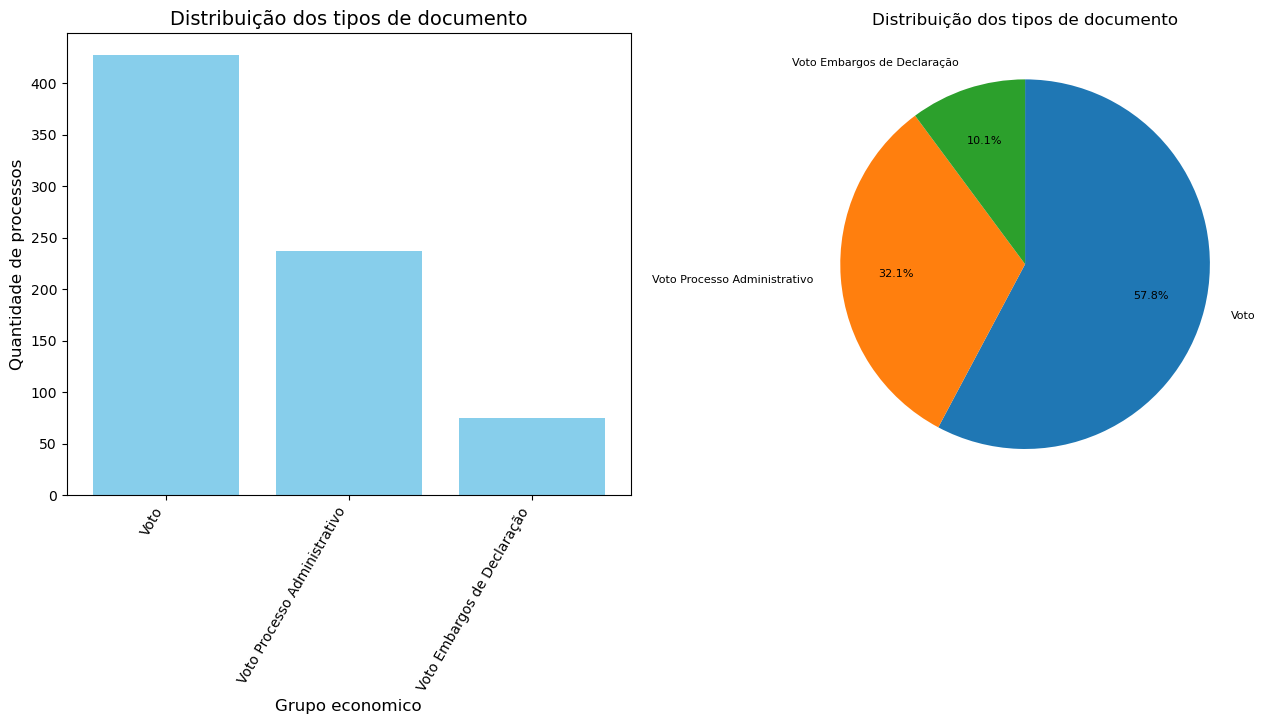

In [10]:
plt.figure(figsize=(16,6))

contagem = df['descricao_tipo_documento'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos tipos de documento', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 10)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 8}  
)
plt.title('Distribuição dos tipos de documento')

plt.show()

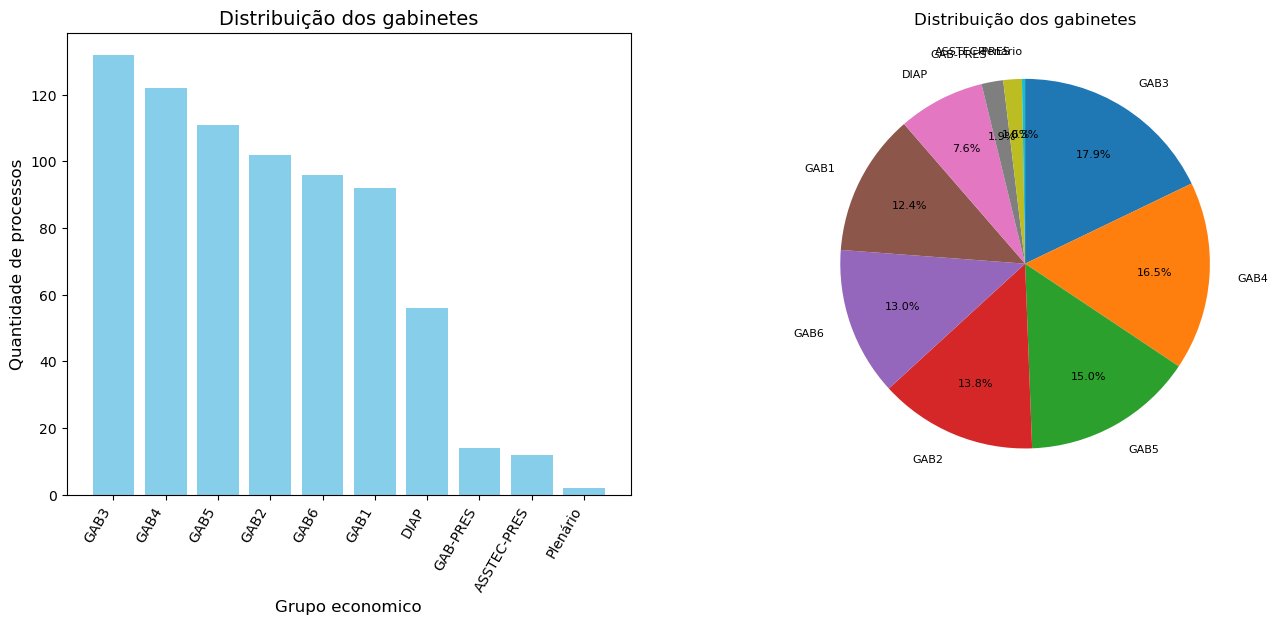

In [11]:
plt.figure(figsize=(16,6))

contagem = df['sigla_unidade'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos gabinetes', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 10)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 8}  
)
plt.title('Distribuição dos gabinetes')

plt.show()

In [12]:
df['taxa_condenacao_gabinete'] = (df['decisao_tribunal'] == 'condenacao').astype(int)

# Agrupe por gabinete e calcule a taxa de condenação
taxa_condenacao = df.groupby('sigla_unidade')['taxa_condenacao_gabinete'].mean().reset_index()
print(taxa_condenacao)
taxa_condenacao.columns = ['sigla_unidade', 'taxa_condenacao']


  sigla_unidade  taxa_condenacao_gabinete
0   ASSTEC-PRES                  0.916667
1          DIAP                  0.750000
2      GAB-PRES                  0.714286
3          GAB1                  0.706522
4          GAB2                  0.843137
5          GAB3                  0.772727
6          GAB4                  0.745902
7          GAB5                  0.729730
8          GAB6                  0.718750
9      Plenário                  1.000000


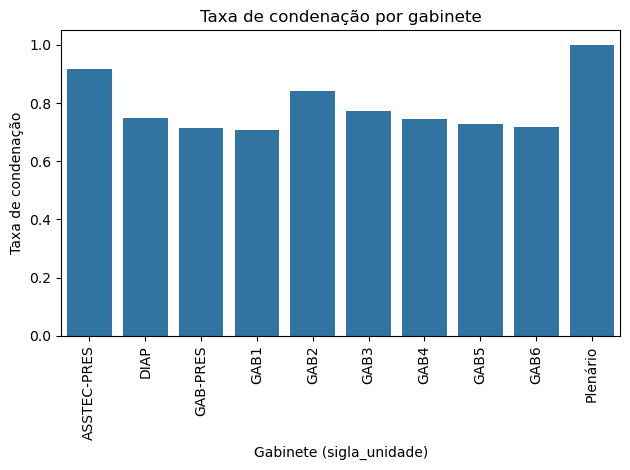

In [13]:
sb.barplot(x='sigla_unidade', y='taxa_condenacao', data=taxa_condenacao)
plt.xticks(rotation=90)
plt.title('Taxa de condenação por gabinete')
plt.xlabel('Gabinete (sigla_unidade)')
plt.ylabel('Taxa de condenação')
plt.tight_layout()
plt.show()

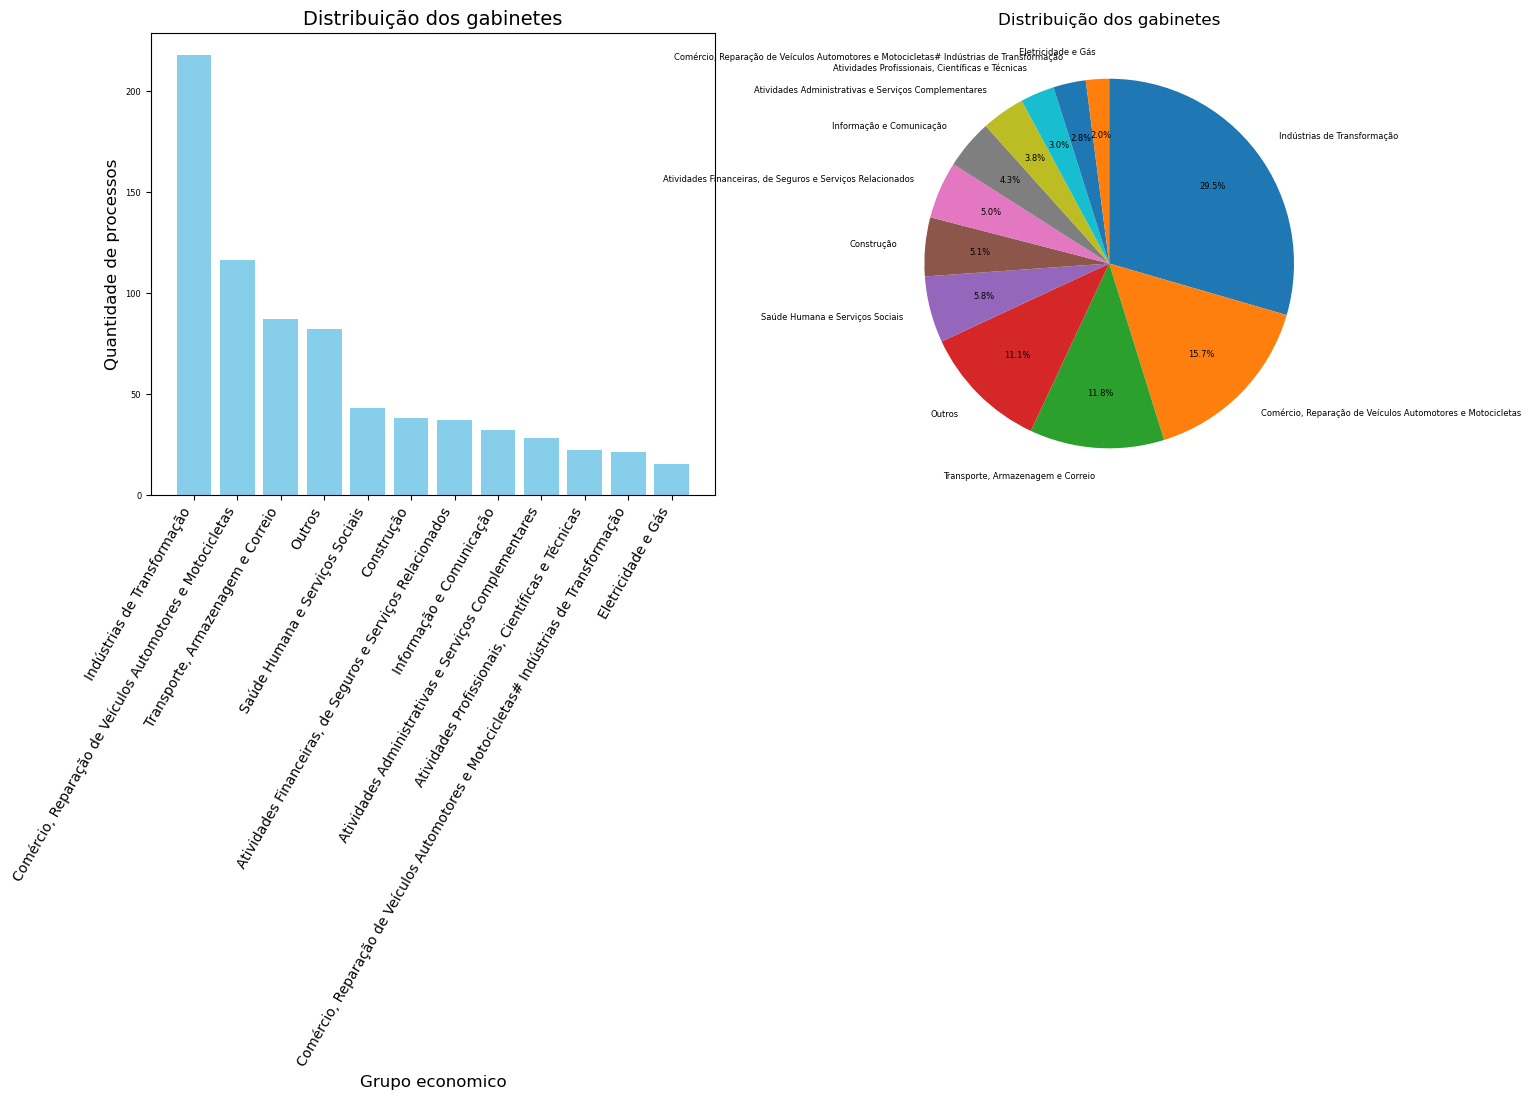

In [14]:
plt.figure(figsize=(16,6))

contagem = df['setor_economico_secao'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos gabinetes', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 6)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 6}  
)
plt.title('Distribuição dos gabinetes')

plt.show()

<div id="modelo"></div>

## Modelo preditivo

<div id="explicacao"></div>

### Aqui será montado um modelo para prever condenações a partir das características do processo pelas variáveis features

Variáveis ***features*** são características que o modelo preditivo irá utilizar para calcular e classificar um novo processo em condenação ou não. As features utilizadas nesse modelo são:
- ano_documento
- assinaturas
- descricao_tipo_documento
- decisao_tribunal
- setor_economico_secao
- grupo_setor
- diferenca_dias
- sigla_unidade
- taxa_condenacao_gabinete
- descricao_especificacao
- mercado_relevante
- conteudo



<div id="montagem"></div>

### Montagem do modelo

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gabriel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
df['descricao_especificacao'] = df['descricao_especificacao'].fillna('')
df['conteudo'] = df['conteudo'].fillna('')

In [17]:
stop_words_pt = stopwords.words('portuguese')

# 2. Pré-processamento básico
# Selecionar features e target
features = ['ano_documento', 'assinaturas', 'descricao_tipo_documento', 
           'decisao_tribunal', 'setor_economico_secao','diferenca_dias',
           'sigla_unidade', 'taxa_condenacao_gabinete', 'descricao_especificacao','mercado_relevante', 'conteudo']
target = 'decisao_tribunal'  # Supondo que esta coluna exista nos dados

X = df[features]
y = df[target]

# 3. Divisão treino-teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.5, 
    random_state=42,
    stratify=X['setor_economico_secao']  # Estratificação por setor econômico
)


In [18]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

print(num_cols)
print(cat_cols)

['ano_documento', 'diferenca_dias', 'taxa_condenacao_gabinete']
['assinaturas', 'descricao_tipo_documento', 'decisao_tribunal', 'setor_economico_secao', 'sigla_unidade', 'descricao_especificacao', 'mercado_relevante', 'conteudo']


In [19]:

# 4. Pipeline de pré-processamento
# Definir colunas por tipo
categorical_features = ['descricao_tipo_documento', 'decisao_tribunal', 'setor_economico_secao', 'mercado_relevante', 'sigla_unidade', 'assinaturas']
numerical_features = ['ano_documento', 'taxa_condenacao_gabinete', 'diferenca_dias']
text_features = ['descricao_especificacao', 'conteudo']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='drop'
)



In [20]:
# Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ))
])

# 6. Treinamento

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ano_documento',
                                                   'diferenca_dias',
                                                   'taxa_condenacao_gabinete']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['assinaturas',
                                                   'descricao_tipo_documento',
                                                   'decisao_tribunal',
                                                   'setor_economico_secao',
                                                   'sigla_unidade',
                                                   'descricao_especificacao',
                                                   'mercado_relevante',
                                                   'conteudo'])])),
                ('regressor',
                 RandomForestClassifier(max_depth=10, min_samples_split=5,
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

<div id="resultados"></div>

### Resultados do modelo

In [21]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }
    
    return metrics

In [22]:
def detailed_classification_analysis(model, X_test, y_test, class_names=None):
    # Previsões
    y_pred = model.predict(X_test)
    
    # Cálculo das métricas
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    # 1. Matriz de Confusão Visual
    plt.figure(figsize=(10,7))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, 
                yticklabels=class_names)
    plt.title('Matriz de Confusão')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()
    
    # 2. Relatório de Classificação em DataFrame
    report_df = pd.DataFrame(report).transpose()
    print("\nRelatório de Classificação Detalhado:")
    display(report_df.round(2))
    
    # 3. Métricas Resumidas
    summary = {
        'Acurácia': report['accuracy'],
        'Precisão Média': report['weighted avg']['precision'],
        'Recall Médio': report['weighted avg']['recall'],
        'F1-Score Médio': report['weighted avg']['f1-score']
    }
    
    return summary, report_df

/home/gabriel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gabriel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gabriel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


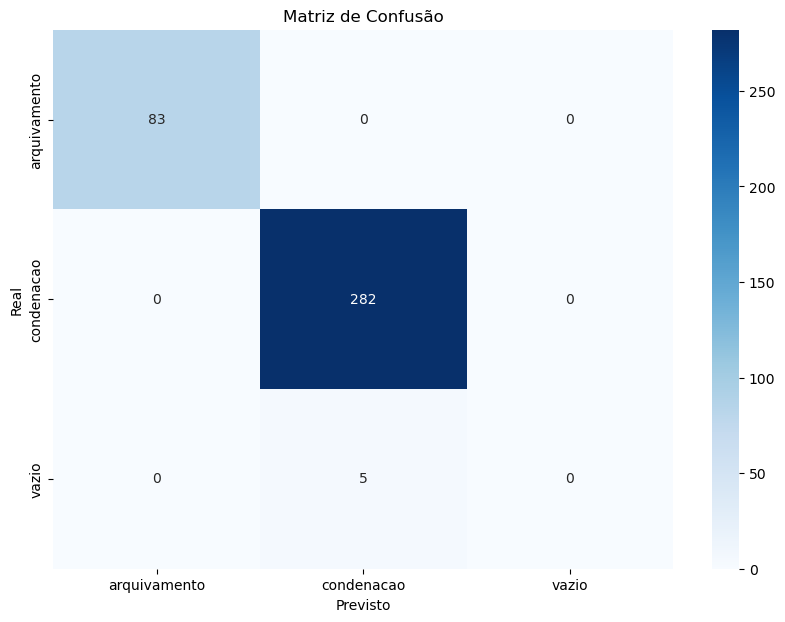


Relatório de Classificação Detalhado:


,precision,recall,f1-score,support
arquivamento,1.00,1.00,1.00,83.00
condenacao,0.98,1.00,0.99,282.00
vazio,0.00,0.00,0.00,5.00
accuracy,0.99,0.99,0.99,0.99
macro avg,0.66,0.67,0.66,370.00
weighted avg,0.97,0.99,0.98,370.00


In [23]:
summary_metrics, detailed_report = detailed_classification_analysis(
    model=rf_pipeline,
    X_test=X_test,
    y_test=y_test,
    class_names=['arquivamento', 'condenacao', 'vazio']  # Nomes das suas classes
)
